<h1 style="text-align:center; font-size:30px; font-weight:bold; background-color:#008080; color:white; padding:20px; border-radius:5px;">
    Advanced Predictive Analytics for Chronic Kidney
Disease using Random Forest
</h1>


<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#ff969a; color:white; padding:20px; border-radius:5px;">
    Section-1 Project Overview
</h1>

Chronic Kidney Disease (CKD) Prediction System aims to leverage machine learning algorithms 
to provide early detection of CKD based on patient health metrics. Utilizing a Random Forest model, 
the system analyzes various health indicators to classify patients as either at risk or not at risk 
of developing CKD, offering personalized health recommendations to improve patient outcomes.

<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#befc73; color:white; padding:20px; border-radius:5px;">
    Section-2 Import Libraries
</h1>

In [94]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from flask import Flask, request, render_template
from flask_ngrok import run_with_ngrok

<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#ca9bf7; color:white; padding:20px; border-radius:5px;">
    Section-3 Load and Explore Dataset
</h1>

In [2]:
# Reading Dataset:
dataset = pd.read_csv("kidney_disease.csv")
# Top 5 records:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [4]:
# Dropping unneccsary feature :
dataset = dataset.drop('id', axis=1)

In [5]:
# Shape of dataset:
dataset.shape

(400, 25)

<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#8acfff; color:white; padding:20px; border-radius:5px;">
    Section-4 Data Preprocessing
</h1>

In [6]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
# Description:
dataset.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
# Datatypes:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [9]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
#Replacing Categorical values with numbers
dataset['rbc'].value_counts()

rbc
normal      201
abnormal     47
Name: count, dtype: int64

In [11]:
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\1868271888.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


In [12]:
dataset['pc'].value_counts()

pc
normal      259
abnormal     76
Name: count, dtype: int64

In [13]:
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\803850354.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


In [14]:
dataset['pcc'].value_counts()

pcc
notpresent    354
present        42
Name: count, dtype: int64

In [15]:
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\3196457339.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})


In [16]:
dataset['ba'].value_counts()

ba
notpresent    374
present        22
Name: count, dtype: int64

In [17]:
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\2271382674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})


In [18]:
dataset['htn'].value_counts()

htn
no     251
yes    147
Name: count, dtype: int64

In [19]:
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\2228437743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [20]:
dataset['dm'].value_counts()

dm
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64

In [21]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})

In [22]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\2648021753.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [23]:
dataset['cad'].value_counts()

cad
no      362
yes      34
\tno      2
Name: count, dtype: int64

In [24]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})

In [25]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\1701594762.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [26]:
dataset['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [27]:
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\374170606.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})


In [28]:
dataset['pe'].value_counts()

pe
no     323
yes     76
Name: count, dtype: int64

In [29]:
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\166025595.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [30]:
dataset['ane'].value_counts()

ane
no     339
yes     60
Name: count, dtype: int64

In [31]:
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

C:\Users\hi\AppData\Local\Temp\ipykernel_11200\1781658938.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [32]:
dataset['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [33]:
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})

In [34]:
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]

In [35]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [36]:
# Datatypes:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [37]:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [38]:
# Datatypes:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [39]:
# Description:
dataset.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [41]:
#Handling Missing Values
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [42]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

In [43]:
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [44]:
dataset.isnull().any().sum()

0

In [45]:
dataset.drop('pcv', axis=1, inplace=True)

In [46]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#fe9645; color:white; padding:20px; border-radius:5px;">
    Section-5 Exploratory Data Analysis
</h1>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your preprocessed data
# Display the first few rows to confirm
print(dataset.head())


    age    bp     sg   al   su  rbc   pc  pcc   ba    bgr    bu   sc    sod  \
0  48.0  80.0  1.020  1.0  0.0  0.0  0.0  0.0  0.0  121.0  36.0  1.2  138.0   
1   7.0  50.0  1.020  4.0  0.0  0.0  0.0  0.0  0.0  121.0  18.0  0.8  138.0   
2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  0.0  0.0  423.0  53.0  1.8  138.0   
3  48.0  70.0  1.005  4.0  0.0  0.0  1.0  1.0  0.0  117.0  56.0  3.8  111.0   
4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  106.0  26.0  1.4  138.0   

   pot  hemo      wc   rc  htn   dm  cad  appet   pe  ane  classification  
0  4.4  15.4  7800.0  5.2  1.0  1.0  0.0    1.0  0.0  0.0               1  
1  4.4  11.3  6000.0  4.8  0.0  0.0  0.0    1.0  0.0  0.0               1  
2  4.4   9.6  7500.0  4.8  0.0  1.0  0.0    0.0  0.0  1.0               1  
3  2.5  11.2  6700.0  3.9  1.0  0.0  0.0    0.0  1.0  1.0               1  
4  4.4  11.6  7300.0  4.6  0.0  0.0  0.0    1.0  0.0  0.0               1  


In [75]:
print("\nDataset Overview:")
print(dataset.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    float64
 6   pc              400 non-null    float64
 7   pcc             400 non-null    float64
 8   ba              400 non-null    float64
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  wc              400 non-null    float64
 16  rc              400 non-null    float64
 17  htn             

In [76]:
# Step 2: Statistical Summary of Numerical Features
print("\nStatistical summary of numerical features:")
print(dataset.describe())



Statistical summary of numerical features:
              age          bp          sg         al          su         rbc  \
count  400.000000  400.000000  400.000000  400.00000  400.000000  400.000000   
mean    51.562500   76.575000    1.017712    0.90000    0.395000    0.117500   
std     16.982996   13.489785    0.005434    1.31313    1.040038    0.322418   
min      2.000000   50.000000    1.005000    0.00000    0.000000    0.000000   
25%     42.000000   70.000000    1.015000    0.00000    0.000000    0.000000   
50%     55.000000   80.000000    1.020000    0.00000    0.000000    0.000000   
75%     64.000000   80.000000    1.020000    2.00000    0.000000    0.000000   
max     90.000000  180.000000    1.025000    5.00000    5.000000    1.000000   

               pc         pcc          ba         bgr          bu          sc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.190000    0.105000    0.055000  145.062500   56.693000    2.99

In [77]:
# Step 3: Visualize Distributions of Numerical Features
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

<Figure size 1500x2800 with 0 Axes>

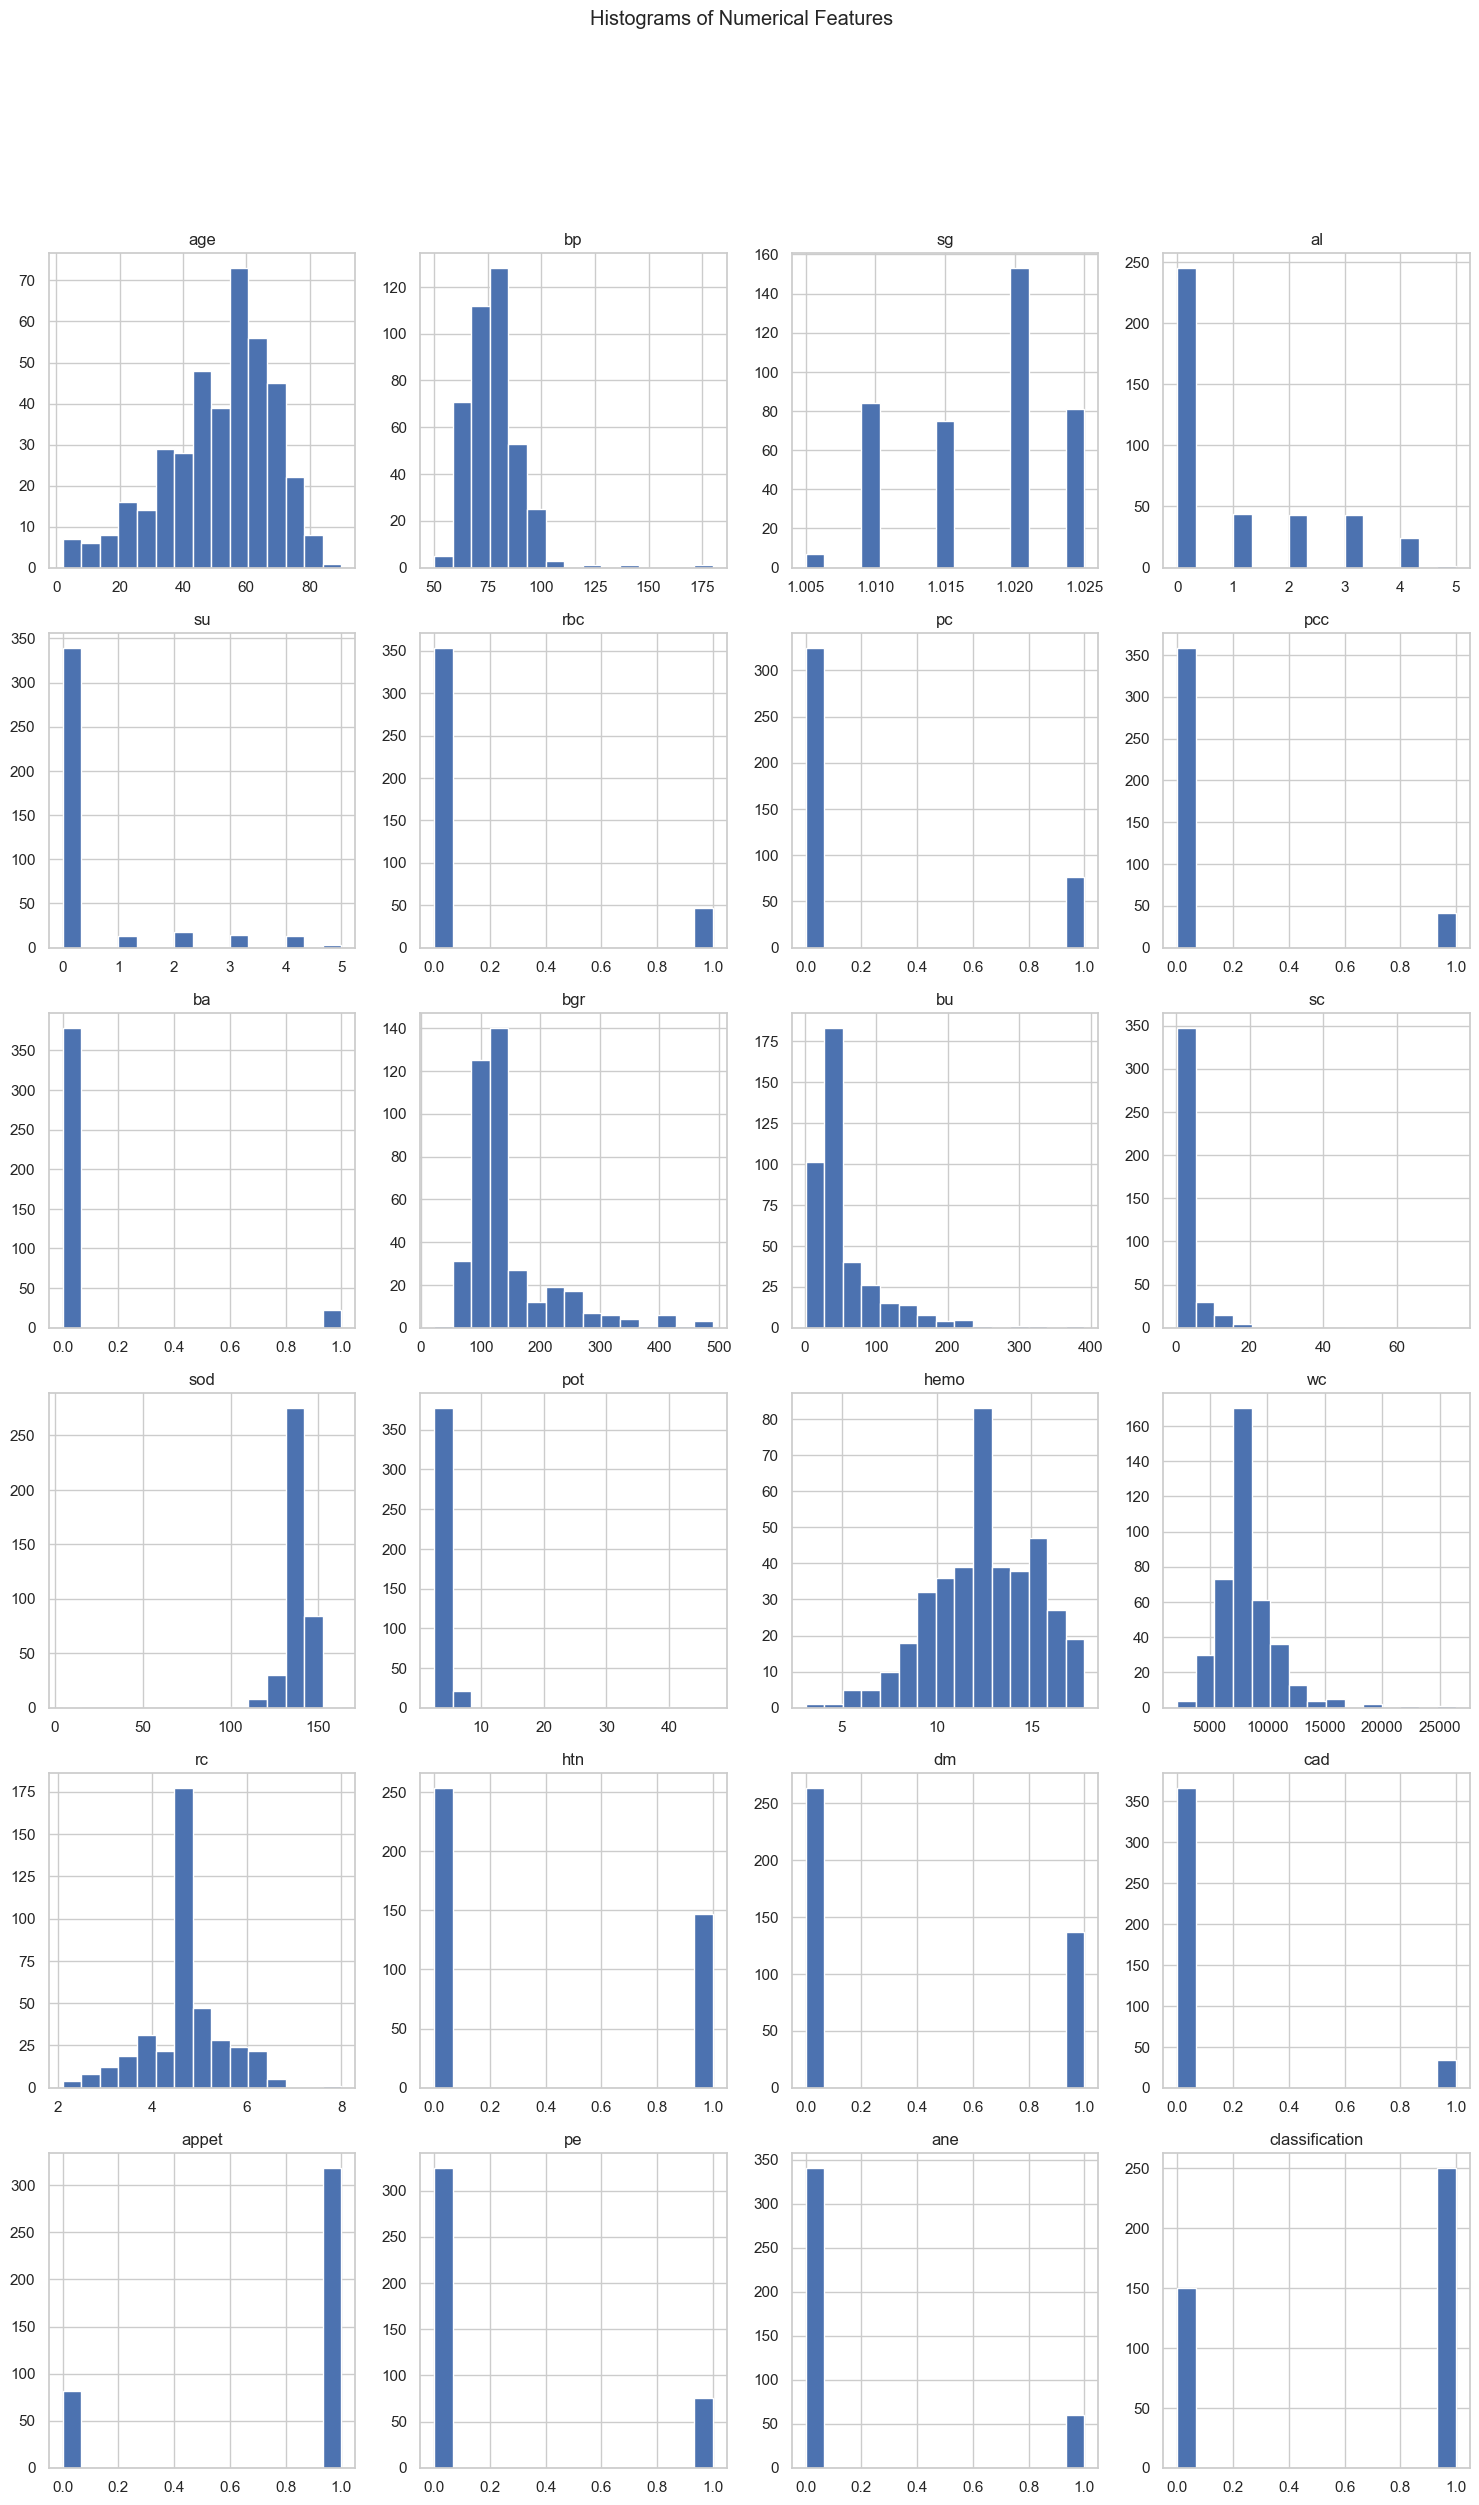

In [93]:
# Step 3: Visualize Distributions of Numerical Features
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of columns and adjust the layout dynamically
num_cols = len(numerical_columns)
num_rows = (num_cols // 4) + 1  # Adjust rows based on number of columns

# Plot histograms for numerical features
plt.figure(figsize=(15, num_rows * 4), facecolor='Red')  # Adjust figure size based on number of rows
dataset[numerical_columns].hist(bins=15, figsize=(15, num_rows * 4), layout=(num_rows, 4))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Distribution of the target variable 'classification':
classification
1    250
0    150
Name: count, dtype: int64


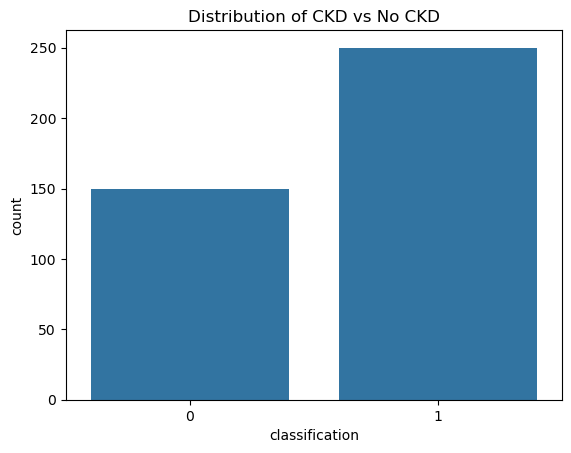

In [80]:
# Step 4: Visualize the distribution of the target variable
# Assuming the target variable is named 'classification'
print("\nDistribution of the target variable 'classification':")
print(dataset['classification'].value_counts())

# Plot the distribution of the target variable
sns.countplot(x='classification', data=dataset)
plt.title('Distribution of CKD vs No CKD')
plt.show()

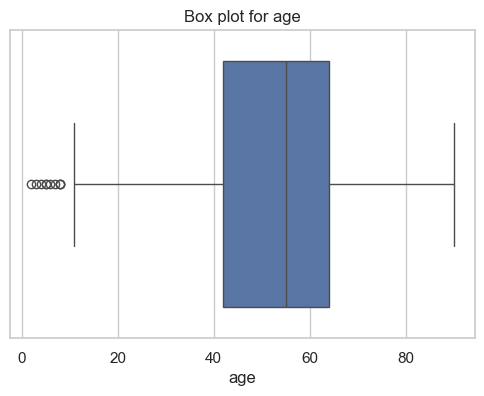

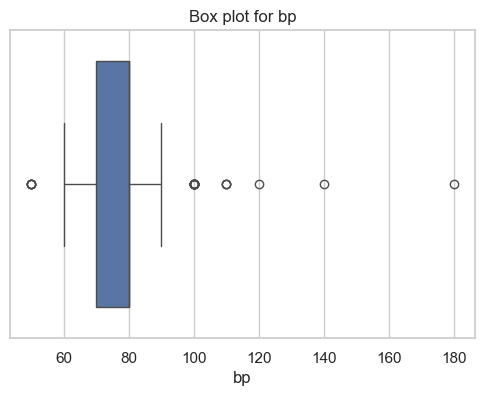

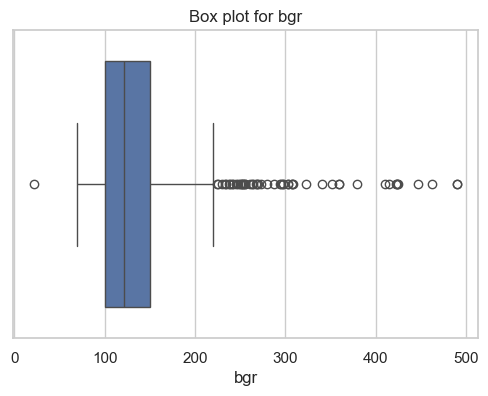

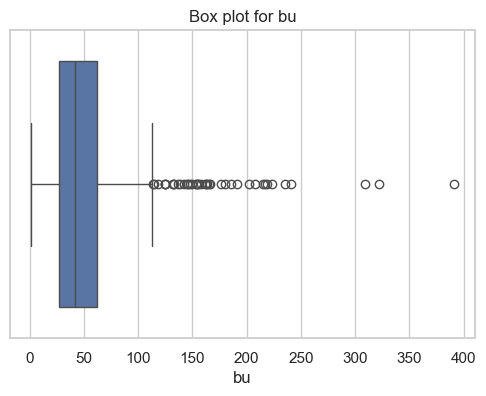

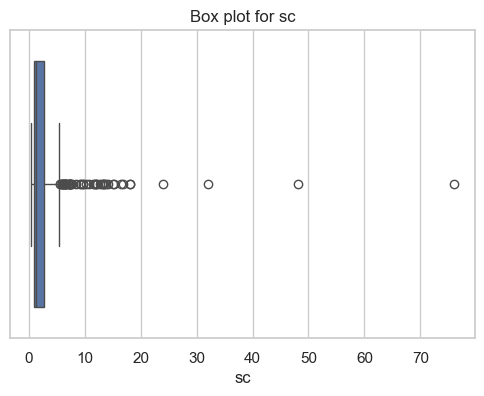

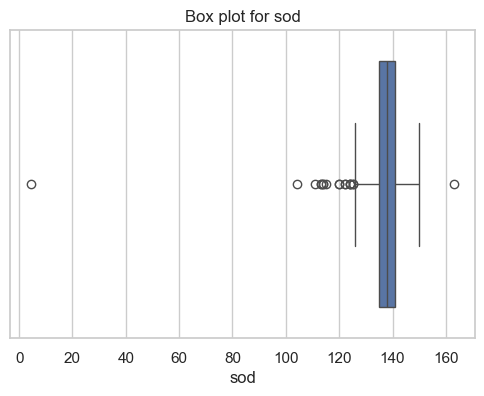

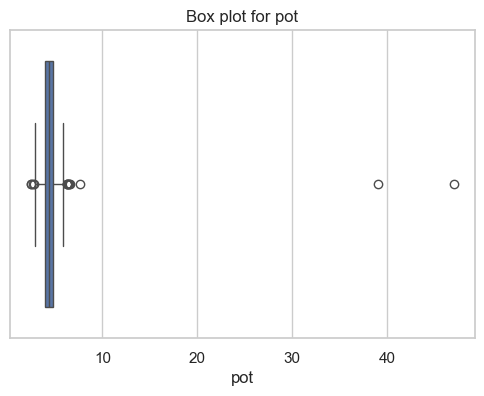

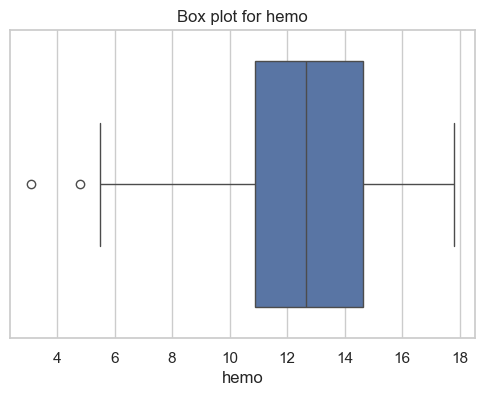

KeyError: 'pcv'

<Figure size 600x400 with 0 Axes>

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the desired theme
sns.set_theme(style='whitegrid')  # Options: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

# Step 6: Outliers Detection using Box Plots
# Check for outliers in key numerical features
key_numerical_features = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'rc', 'wc']

for col in key_numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataset[col])
    plt.title(f'Box plot for {col}')
    plt.show()


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


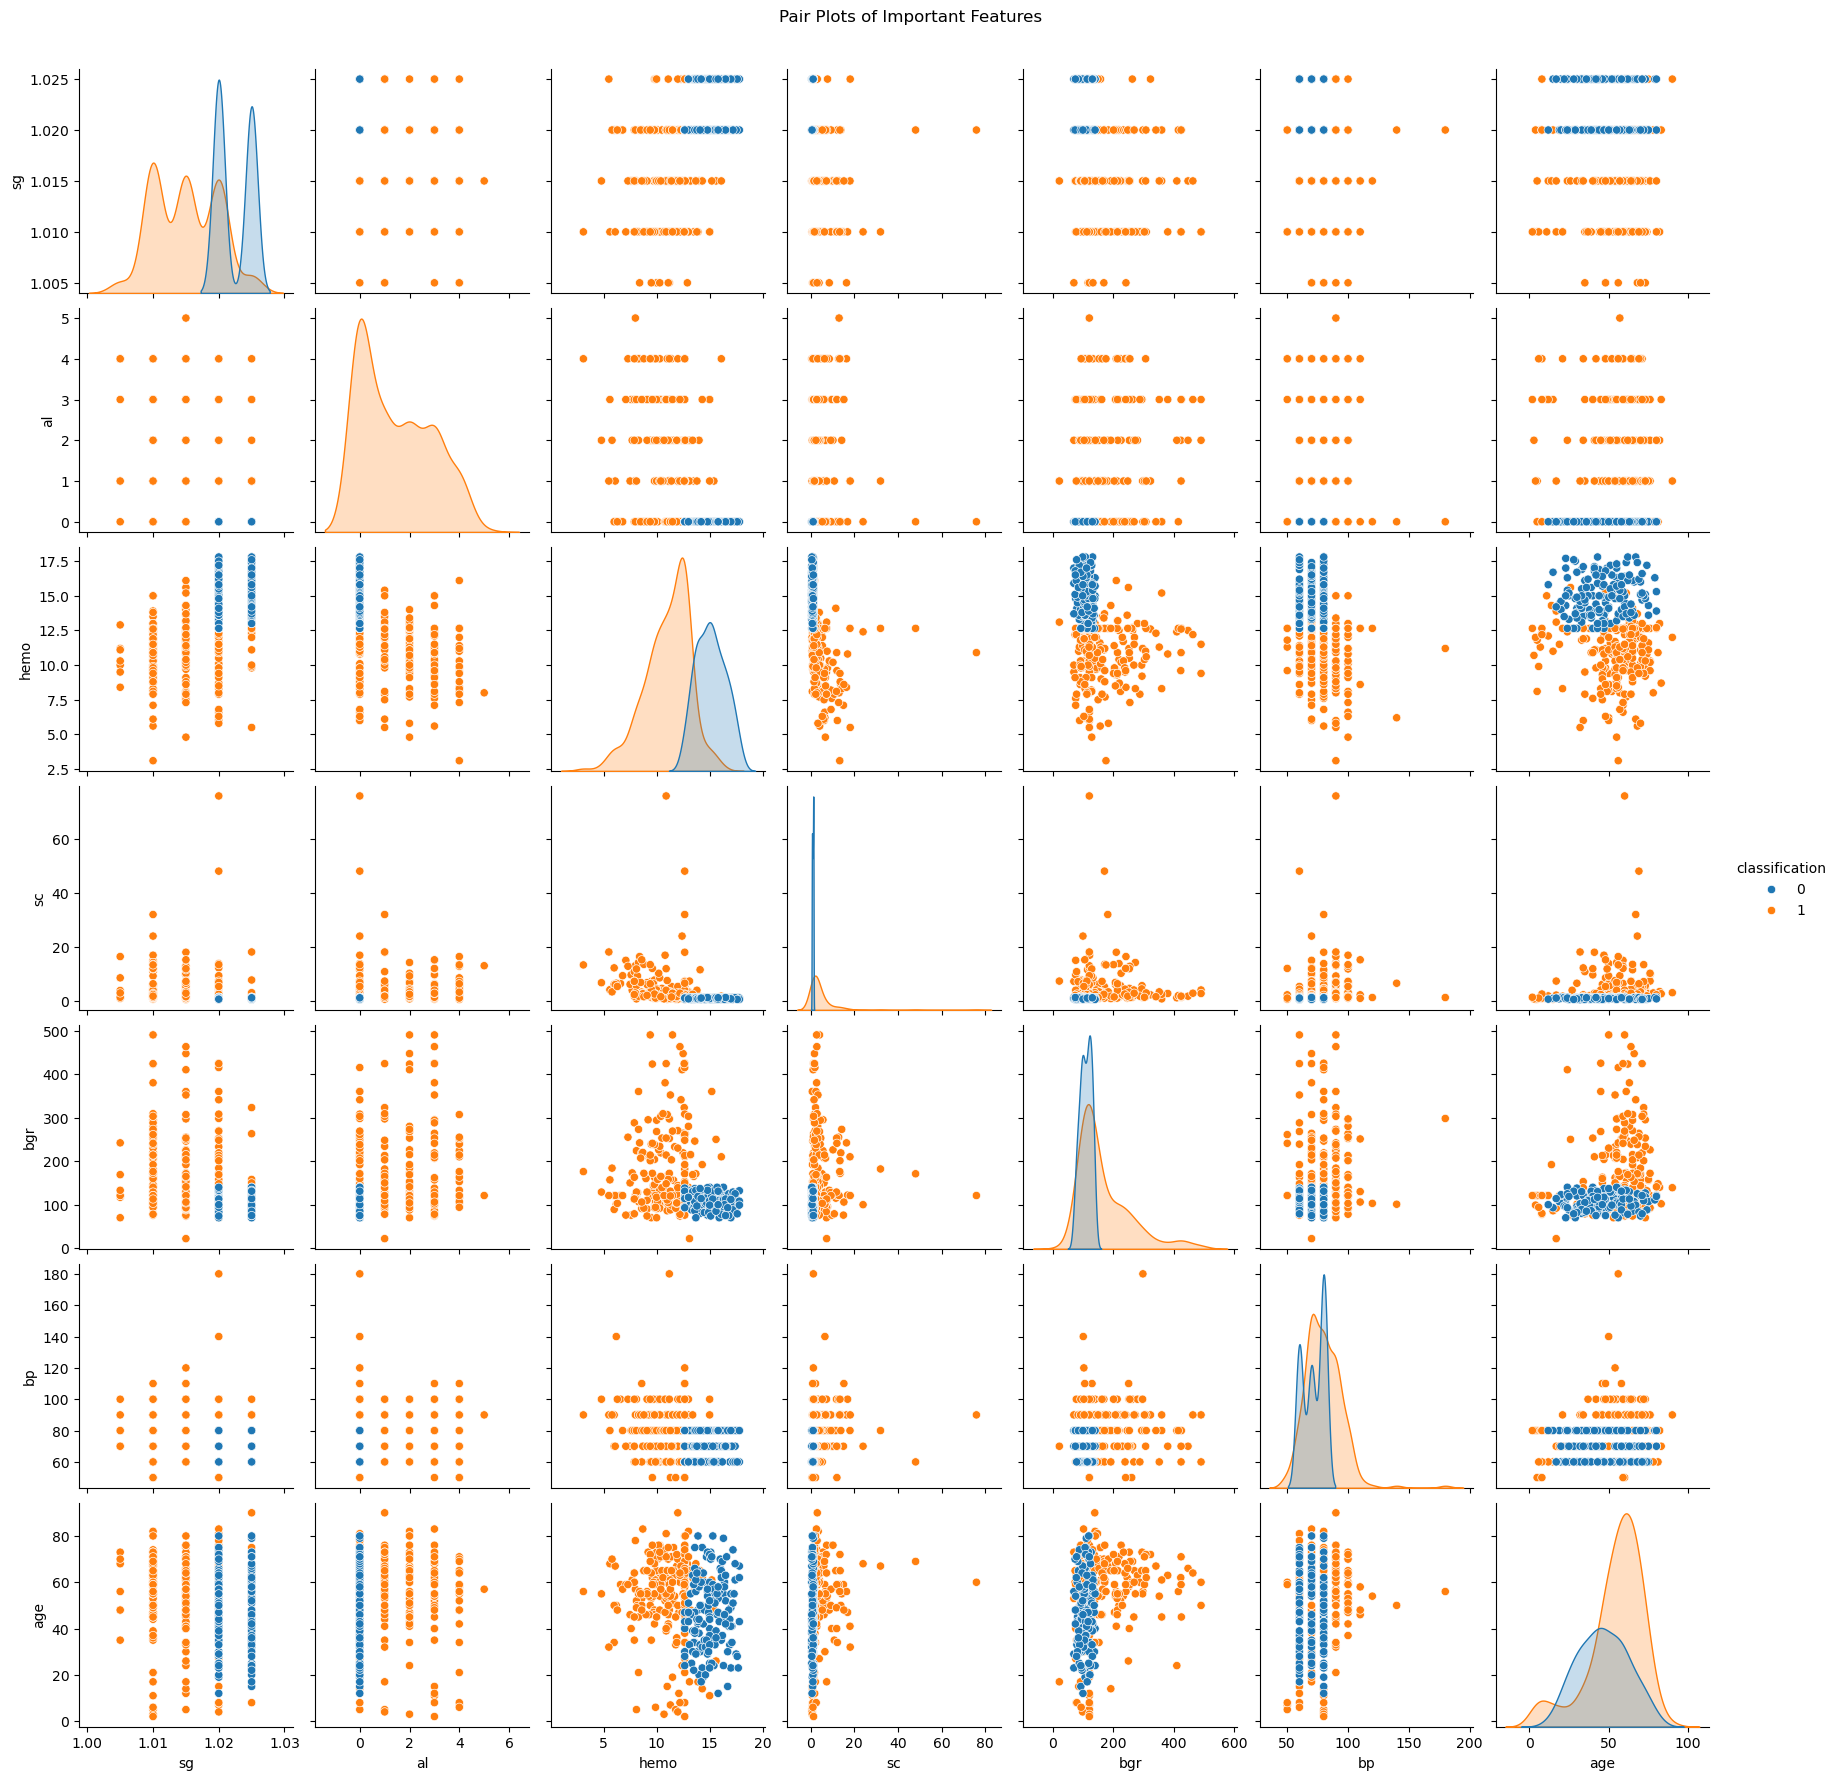

In [84]:
# Update the list of important features based on available columns
important_features = ['sg', 'al', 'hemo', 'sc', 'bgr', 'bp', 'age', 'classification']

# Adjust the pairplot code accordingly
sns.pairplot(dataset[important_features], hue='classification', diag_kind='kde')
plt.suptitle('Pair Plots of Important Features', y=1.02)
plt.show()


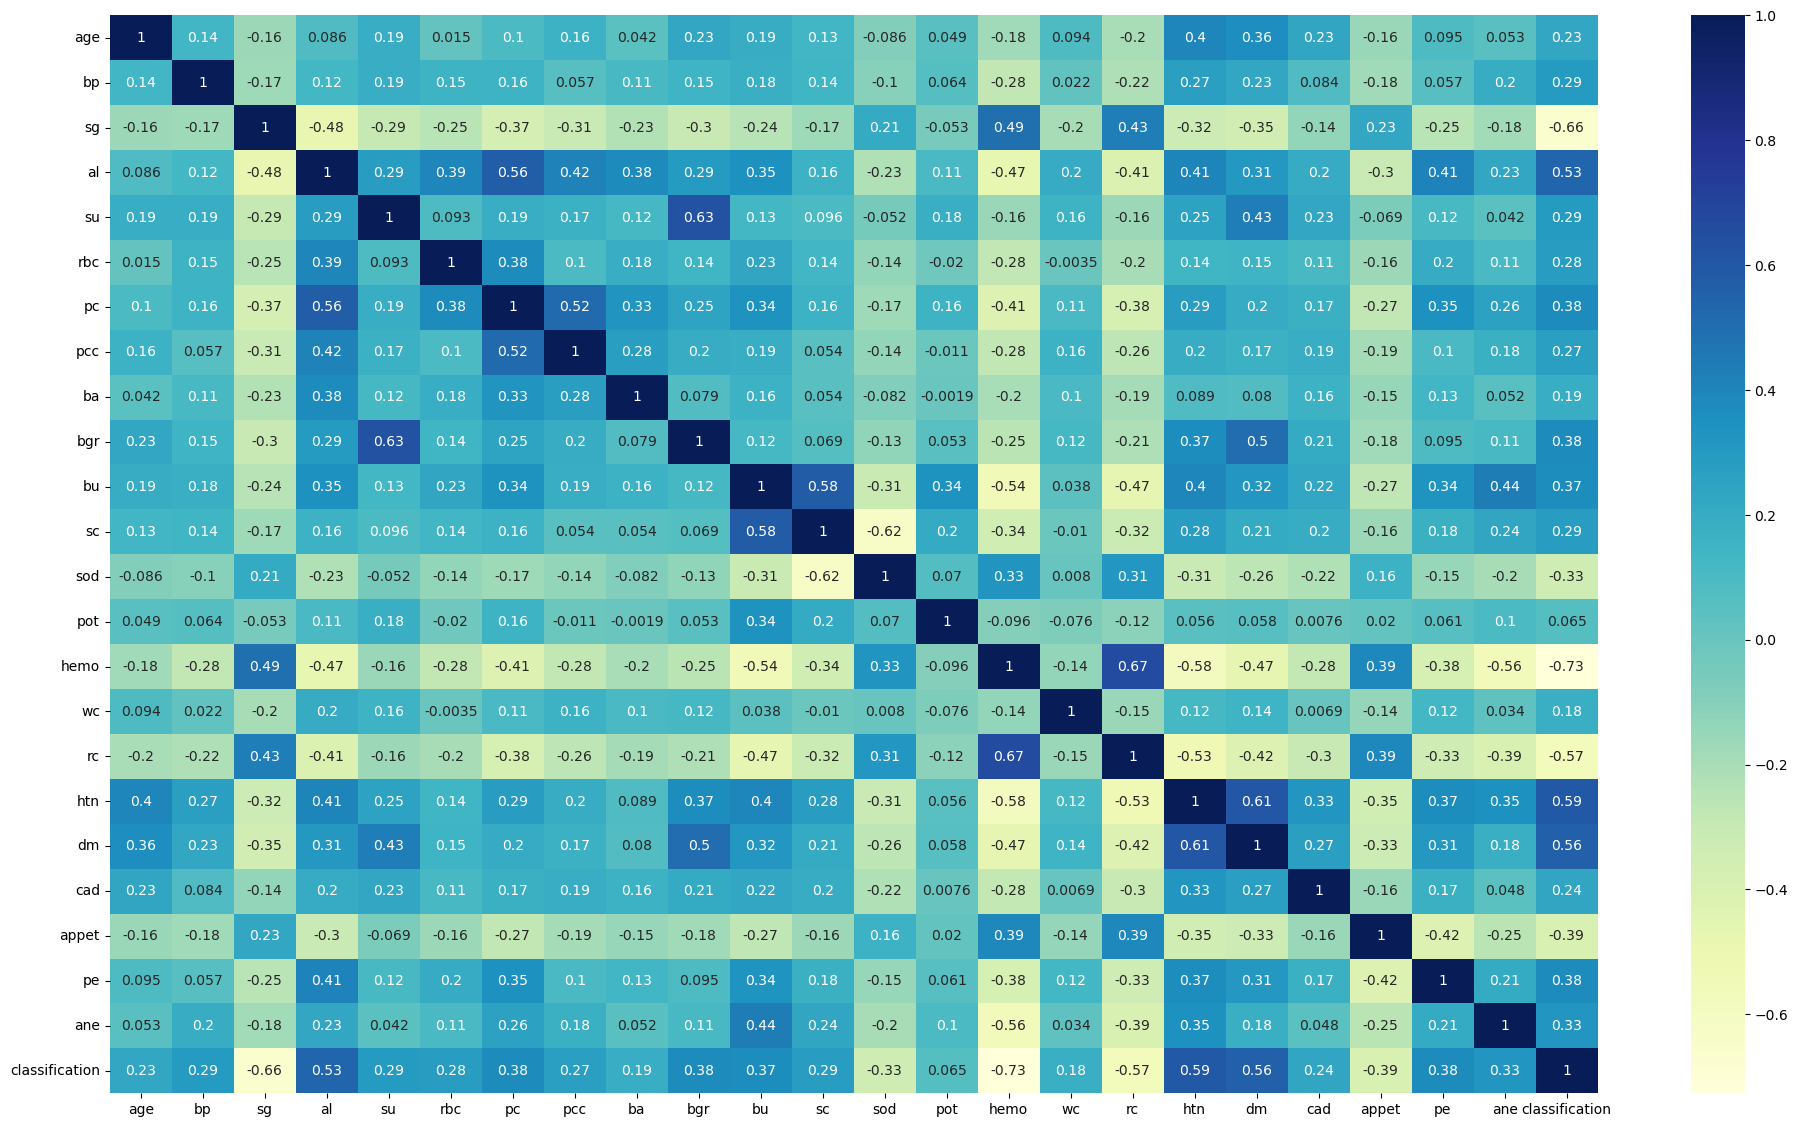

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#8ff0c6; color:white; padding:20px; border-radius:5px;">
    Section-6 Feature Selection
</h1>

In [48]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [49]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0


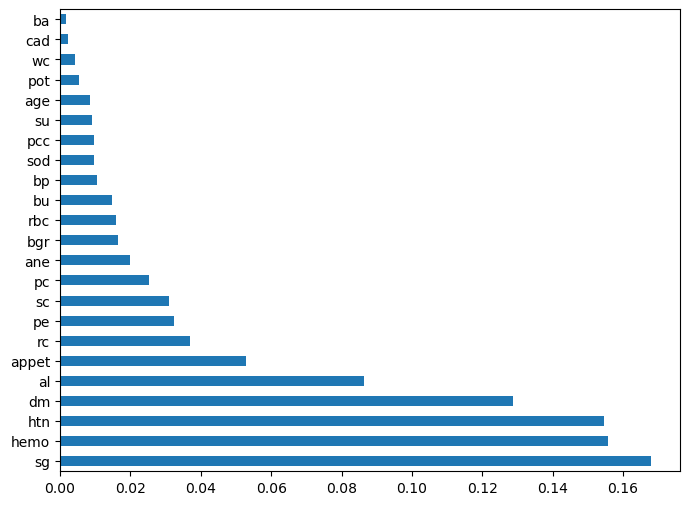

In [50]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [51]:
ranked_features.nlargest(8).index

Index(['sg', 'hemo', 'htn', 'dm', 'al', 'appet', 'rc', 'pe'], dtype='object')

In [52]:
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0


In [53]:
X.tail()

,sg,htn,hemo,dm,al,appet,rc,pc
395,1.020,0.0,15.7,0.0,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,0.0,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,0.0,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,0.0,0.0,1.0,5.9,0.0
399,1.025,0.0,15.8,0.0,0.0,1.0,6.1,0.0


In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#77dd77; color:white; padding:20px; border-radius:5px;">
    Section-7 Model Training and Tuning
</h1>

In [55]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [56]:
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


In [57]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [58]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 1.0
[[58  0]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [59]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#8acfff; color:white; padding:20px; border-radius:5px;">
    Section-8 Testing with new Entries
</h1>

In [60]:
new_ckd_data = {
    'age': 65, 'bp': 160, 'sg': 1.010, 'al': 3, 'su': 2, 'rbc': 1, 'pc': 1, 
    'pcc': 1, 'ba': 1, 'bgr': 300, 'bu': 80, 'sc': 4.5, 'sod': 130, 'pot': 5.5, 
    'hemo': 9.0, 'rc': 3.0, 'htn': 1, 'dm': 1, 'cad': 1, 'appet': 0, 'pe': 1, 'ane': 1
}

# Create DataFrame for new CKD data
new_ckd_df = pd.DataFrame([new_ckd_data])


In [61]:
new_non_ckd_data = {
    'age': 45, 'bp': 120, 'sg': 1.020, 'al': 0, 'su': 0, 'rbc': 0, 'pc': 0, 
    'pcc': 0, 'ba': 0, 'bgr': 110, 'bu': 20, 'sc': 0.9, 'sod': 140, 'pot': 4.0, 
    'hemo': 14.0, 'rc': 5.0, 'htn': 0, 'dm': 0, 'cad': 0, 'appet': 1, 'pe': 0, 'ane': 0
}

# Create DataFrame for new non-CKD data
new_non_ckd_df = pd.DataFrame([new_non_ckd_data])

In [62]:
# Use only the important features selected during training
features = ['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']

# Select these features from the new CKD and non-CKD data
new_ckd_processed = new_ckd_df[features]
new_non_ckd_processed = new_non_ckd_df[features]

# If any missing values need to be handled:
new_ckd_processed = new_ckd_processed.fillna(new_ckd_processed.median())
new_non_ckd_processed = new_non_ckd_processed.fillna(new_non_ckd_processed.median())


In [63]:
# Prediction for CKD entry using RandomForest
ckd_prediction_rf = RandomForest.predict(new_ckd_processed)
ckd_result_rf = 'CKD' if ckd_prediction_rf[0] == 1 else 'No CKD'
print(f'Random Forest Prediction for CKD entry: {ckd_result_rf}')

# Prediction for Non-CKD entry using RandomForest
non_ckd_prediction_rf = RandomForest.predict(new_non_ckd_processed)
non_ckd_result_rf = 'CKD' if non_ckd_prediction_rf[0] == 1 else 'No CKD'
print(f'Random Forest Prediction for Non-CKD entry: {non_ckd_result_rf}')

# Similarly, you can predict using other models, e.g., AdaBoost and GradientBoost:
ckd_prediction_ada = AdaBoost.predict(new_ckd_processed)
non_ckd_prediction_ada = AdaBoost.predict(new_non_ckd_processed)

ckd_prediction_gb = GradientBoost.predict(new_ckd_processed)
non_ckd_prediction_gb = GradientBoost.predict(new_non_ckd_processed)

# Output the predictions
print(f'AdaBoost CKD Prediction: {"CKD" if ckd_prediction_ada[0] == 1 else "No CKD"}')
print(f'GradientBoost CKD Prediction: {"CKD" if ckd_prediction_gb[0] == 1 else "No CKD"}')

print(f'AdaBoost Non-CKD Prediction: {"CKD" if non_ckd_prediction_ada[0] == 1 else "No CKD"}')
print(f'GradientBoost Non-CKD Prediction: {"CKD" if non_ckd_prediction_gb[0] == 1 else "No CKD"}')


Random Forest Prediction for CKD entry: CKD
Random Forest Prediction for Non-CKD entry: No CKD
AdaBoost CKD Prediction: CKD
GradientBoost CKD Prediction: CKD
AdaBoost Non-CKD Prediction: No CKD
GradientBoost Non-CKD Prediction: No CKD


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [65]:
import pickle

# Assuming 'rf_model' is your trained Random Forest model
# Save the model to a file
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(RandomForest, f)

print("Model saved as 'rf_model.pkl'.")


Model saved as 'rf_model.pkl'.


<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#befc73; color:white; padding:20px; border-radius:5px;">
    Section-9 Deploying Widgets
</h1>

In [95]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import pickle


# Define input widgets for each feature
age_input = widgets.FloatText(description='Age:')
bp_input = widgets.FloatText(description='Blood Pressure:')
sg_input = widgets.FloatText(description='Specific Gravity:')
al_input = widgets.FloatText(description='Albumin:')
su_input = widgets.FloatText(description='Sugar:')
rbc_input = widgets.Dropdown(options=[('Normal', 0), ('Abnormal', 1)], description='RBC:')
pc_input = widgets.Dropdown(options=[('Normal', 0), ('Abnormal', 1)], description='PC:')
pcc_input = widgets.Dropdown(options=[('Not Present', 0), ('Present', 1)], description='PCC:')
ba_input = widgets.Dropdown(options=[('Not Present', 0), ('Present', 1)], description='Bacteria:')
bgr_input = widgets.FloatText(description='Blood Glucose Random:')
bu_input = widgets.FloatText(description='Blood Urea:')
sc_input = widgets.FloatText(description='Serum Creatinine:')
sod_input = widgets.FloatText(description='Sodium:')
pot_input = widgets.FloatText(description='Potassium:')
hemo_input = widgets.FloatText(description='Hemoglobin:')
rc_input = widgets.FloatText(description='Red Blood Cells Count:')
htn_input = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='Hypertension:')
dm_input = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='Diabetes Mellitus:')
cad_input = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='Coronary Artery Disease:')
appet_input = widgets.Dropdown(options=[('Good', 1), ('Poor', 0)], description='Appetite:')
pe_input = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='Pedal Edema:')
ane_input = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='Anemia:')

# Create a button for prediction
predict_button = widgets.Button(description='Predict')

# Create a widget to display the output
output = widgets.Output()

# Function to process input data and make predictions
def on_predict_button_clicked(b):
    # Collect input data into a DataFrame
    input_data = pd.DataFrame({
        'sg': [sg_input.value],
        'htn': [htn_input.value],
        'hemo': [hemo_input.value],
        'dm': [dm_input.value],
        'al': [al_input.value],
        'appet': [appet_input.value],
        'rc': [rc_input.value],
        'pc': [pc_input.value]
    })
    
    # If any missing values need to be handled (use median here)
    input_data = input_data.fillna(input_data.median())
    
    # Make predictions using the models
    rf_prediction = RandomForest.predict(input_data)[0]
    ada_prediction = AdaBoost.predict(input_data)[0]
    gb_prediction = GradientBoost.predict(input_data)[0]
    
    # Convert predictions to human-readable form
    rf_result = 'CKD Detected' if rf_prediction == 1 else 'No CKD Detected'
    ada_result = 'CKD Detected' if ada_prediction == 1 else 'No CKD Detected'
    gb_result = 'CKD Detected' if gb_prediction == 1 else 'No CKD Detected'
    
    # Display the prediction results
    with output:
        output.clear_output()
        print("Input Data:")
        display(input_data)
        print(f"Random Forest Prediction: {rf_result}")
        print(f"AdaBoost Prediction: {ada_result}")
        print(f"GradientBoost Prediction: {gb_result}")

# Attach the function to the button
predict_button.on_click(on_predict_button_clicked)

# Display the GUI
input_widgets = widgets.VBox([
    age_input, bp_input, sg_input, al_input, su_input, rbc_input, pc_input, pcc_input, ba_input, bgr_input,
    bu_input, sc_input, sod_input, pot_input, hemo_input, rc_input, htn_input, dm_input, cad_input,
    appet_input, pe_input, ane_input, predict_button, output
])

# Extend the prediction function in widgets to include health recommendations
def generate_recommendations(prediction):
    if prediction == 1:  # CKD
        return [
            "Maintain a low-salt and low-protein diet.",
            "Regularly monitor blood pressure and glucose levels.",
            "Stay hydrated but limit fluid intake if advised by a doctor.",
            "Consult a doctor for exercise recommendations."
        ]
    else:  # No CKD
        return [
            "Maintain a balanced diet and regular exercise.",
            "Stay hydrated and manage a healthy weight.",
            "Schedule routine check-ups for early detection of potential issues."
        ]

def on_predict_button_clicked(b):
    input_data = pd.DataFrame({
        'sg': [sg_input.value], 'htn': [htn_input.value], 'hemo': [hemo_input.value],
        'dm': [dm_input.value], 'al': [al_input.value], 'appet': [appet_input.value],
        'rc': [rc_input.value], 'pc': [pc_input.value]
    })
    input_data = input_data.fillna(input_data.median())
    
    rf_prediction = RandomForest.predict(input_data)[0]
    recommendations = generate_recommendations(rf_prediction)
    
    with output:
        output.clear_output()
        display(input_data)
        print("Prediction Result:", "CKD Detected" if rf_prediction == 1 else "No CKD Detected")
        print("Health Recommendations:")
        for rec in recommendations:
            print(f"- {rec}")

predict_button.on_click(on_predict_button_clicked)

display(input_widgets)


<h1 style="text-align:center; font-size:24px; font-weight:bold; background-color:#ff6862; color:white; padding:20px; border-radius:5px;">
    Section-8 Flask Web App Setup
</h1>

In [96]:
from flask import Flask, request, render_template_string
import numpy as np
import joblib

app = Flask(__name__)

# Load the model and scaler
model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')

# Recommendation function
def generate_recommendations(prediction):
    if prediction == 1:
        return [
            "Maintain a low-salt and low-protein diet.",
            "Regularly monitor blood pressure and glucose levels.",
            "Stay hydrated but avoid excessive fluid intake.",
            "Consult a doctor for personalized exercise advice."
        ]
    else:
        return [
            "Continue a balanced diet and regular exercise.",
            "Stay hydrated and maintain a healthy weight.",
            "Schedule routine check-ups to monitor kidney health."
        ]

# Define the CSS styles as a string
style = '''
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f8ff;
        margin: 0;
        padding: 20px;
    }
    .container {
        max-width: 600px;
        margin: auto;
        background: #fff;
        padding: 20px;
        border-radius: 10px;
        box-shadow: 0px 0px 10px rgba(0,0,0,0.1);
    }
    h1 {
        text-align: center;
        color: #333;
    }
    form {
        display: flex;
        flex-direction: column;
    }
    label {
        margin: 10px 0 5px;
    }
    input {
        padding: 10px;
        margin-bottom: 15px;
        border-radius: 5px;
        border: 1px solid #ddd;
    }
    button {
        padding: 10px;
        background-color: #007BFF;
        color: #fff;
        border: none;
        border-radius: 5px;
        cursor: pointer;
    }
    button:hover {
        background-color: #0056b3;
    }
    .result {
        text-align: center;
        margin-top: 20px;
    }
    .recommendations {
        background: #f9f9f9;
        padding: 15px;
        border-radius: 10px;
        margin-top: 20px;
    }
    .recommendations ul {
        padding: 0;
    }
    .recommendations li {
        list-style: none;
        margin: 5px 0;
    }
    a {
        display: block;
        margin-top: 20px;
        text-align: center;
        text-decoration: none;
        color: #007BFF;
    }
    a:hover {
        text-decoration: underline;
    }
'''

@app.route('/')
def home():
    return render_template_string('''
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>CKD Prediction</title>
            <style>{{ style }}</style>
        </head>
        <body>
            <div class="container">
                <h1>Chronic Kidney Disease Prediction</h1>
                <form action="/predict" method="post">
                    <label>Specific Gravity:</label>
                    <input type="number" step="0.01" name="sg" required>
                    
                    <label>Hypertension (1 = Yes, 0 = No):</label>
                    <input type="number" name="htn" min="0" max="1" required>
                    
                    <label>Hemoglobin Level:</label>
                    <input type="number" step="0.1" name="hemo" required>
                    
                    <label>Diabetes Mellitus (1 = Yes, 0 = No):</label>
                    <input type="number" name="dm" min="0" max="1" required>
                    
                    <label>Albumin Level:</label>
                    <input type="number" name="al" required>
                    
                    <label>Appetite (1 = Good, 0 = Poor):</label>
                    <input type="number" name="appet" min="0" max="1" required>
                    
                    <label>Red Blood Cells Count:</label>
                    <input type="number" step="0.1" name="rc" required>
                    
                    <label>Pus Cell (1 = Normal, 0 = Abnormal):</label>
                    <input type="number" name="pc" min="0" max="1" required>
                    
                    <button type="submit">Predict</button>
                </form>
            </div>
        </body>
        </html>
    ''', style=style)

@app.route('/predict', methods=['POST'])
def predict():
    # Gather data from form
    data = request.form.to_dict()
    input_data = np.array([float(value) for value in data.values()]).reshape(1, -1)
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    
    # Make a prediction
    prediction = model.predict(input_data_scaled)[0]
    
    # Generate health recommendations
    recommendations = generate_recommendations(prediction)
    
    # Render the result page
    return render_template_string('''
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>CKD Prediction Result</title>
            <style>{{ style }}</style>
        </head>
        <body>
            <div class="container">
                <div class="result">
                    <h1>Prediction Result: {{ "CKD Detected" if prediction == 1 else "No CKD Detected" }}</h1>
                </div>
                <div class="recommendations">
                    <h3>Health Recommendations:</h3>
                    <ul>
                        {% for rec in recommendations %}
                            <li>{{ rec }}</li>
                        {% endfor %}
                    </ul>
                </div>
                <a href="/">Predict Another</a>
            </div>
        </body>
        </html>
    ''', prediction=prediction, recommendations=recommendations, style=style)

# Run the app
app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.108.180:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Oct/2024 11:16:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2024 11:16:32] "GET /favicon.ico HTTP/1.1" 404 -
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [28/Oct/2024 11:17:01] "POST /predict HTTP/1.1" 200 -
